# Project Proposal: Advanced NLP-based Job Recommendation System for BrighterMonday

###### CAPSTONE PROJECT
***PHASE 5:GROUP 2 MEMBERS:***
1.   Isaac Munyaka.
2.   Phemina Wambui.
3.   Otiende Ogada.
4.   Caroline Gesaka.
5.   Anne Njoroge.
6.   Joan Maina.

## Background Story

Recruiting firms, such as BrighterMonday, connect employers with job seekers by advertising job positions. Despite numerous job postings, employers often struggle to attract suitable candidates, resulting in inefficient hiring processes.

## Introduction


## Business Understanding
The goal of this project is to significantly enhance the accuracy and relevance of job matching on BrighterMonday, ultimately improving the job search experience for seekers and streamlining the recruitment process for employers. By implementing an advanced NLP-based recommendation system, the project aims to provide job seekers with tailored job opportunities that align closely with their skills, preferences, and career goals. For employers, the system will facilitate the identification of qualified candidates by matching job postings with the most suitable applicants. This dual focus will not only help job seekers find better employment opportunities but also assist employers in efficiently sourcing candidates who meet their specific requirements.

## Problem Statement
Recruiting firms face the challenge of ensuring that job postings effectively attract suitable candidates. The current approach often results in low application rates and mismatched candidates, leading to inefficiencies in the hiring process.

## Objectives

1.	Enhance Job Posting Quality: Improve the quality and appeal of job descriptions to attract more qualified candidates.
2.	Predict Candidate Interest: Develop a classification model to predict the likelihood of job seekers applying for specific job postings.
3.	Optimize Job Recommendations: Provide personalized job recommendations to job seekers to match them with the most suitable job postings.
4.	Increase Application Rates: Implement strategies to boost application rates for job postings, ensuring employers receive more and better applications.


## Target Audience
***Job Seekers***: Individuals seeking suitable job opportunities and career growth.

***Employers***: Companies looking to recruit qualified candidates for job openings.

***Recruitment Agencies***: Agencies that assist job seekers and employers in the recruitment process.

## SUCCESS METRICS

1.	Application Rate: Measure the percentage of job postings that receive applications. An increase in this rate indicates that job postings are more appealing to job seekers.
2.	Qualified Application Rate: Track the percentage of applications that meet the job requirements. A higher rate signifies that job postings are attracting more suitable candidates.
3.	Time to Fill: Measure the average time taken to fill a job position from the posting date to the hiring date. A reduction in this time suggests improved efficiency in attracting and hiring candidates.
4.	Click-Through Rate (CTR): Monitor the percentage of job seekers who click on job postings. An increase in CTR indicates that job postings are effectively capturing job seekers' interest.
5.	Candidate Engagement: Track metrics such as the number of views, shares, and saves for job postings. Higher engagement levels reflect increased interest in the job postings.


## 1.Data Understanding

***Dataset***: LinkedIn Job Postings

***Source***: LinkedIn Job Postings (2023 - 2024) (kaggle.com)

***Columns***:

job_id: Unique identifier for each job posting, essential for tracking and referencing individual jobs.

company_name: Provides the name of the company offering the job, which helps in understanding the job context and employer branding.

title: The job title is critical for identifying the nature of the job and matching it with user preferences.

description: Contains detailed information about job responsibilities and requirements, which is crucial for matching the job with user skills and interests.

max_salary: Indicates the highest salary offered for the job, helping to match job seekers' salary expectations.

min_salary: Shows the lowest salary offered, providing a range for matching job seekers' financial requirements.

location: Geographic location of the job, which is important for matching based on job seekers' preferred or available locations.

views: Number of views the job posting has received, which can indicate the popularity or competitiveness of the job.

med_salary: Median salary for the job, providing a central measure of compensation, useful for understanding typical earnings.

applies: Number of applications received, which can reflect job demand and help gauge the job's attractiveness.

remote_allowed: Indicates if remote work is an option, which is increasingly relevant for job seekers preferring or needing remote work arrangements.

formatted_experience_level: Specifies the required experience level (e.g., entry-level, senior), aiding in matching jobs with job seekers' experience.

skills_desc: Describes the skills required for the job, crucial for aligning job seekers' skills with job requirements.

listed_time: Timestamp of when the job was posted, helping to understand the job’s recency and relevance.

posting_domain: Indicates the industry or sector of the job, useful for matching jobs with job seekers’ industry interests.

currency: Specifies the currency in which the salary is offered, important for job seekers in different regions or countries.

compensation_type: Details the type of compensation (e.g., base salary, bonuses), helping job seekers understand the total compensation package.


#### Load the DataSet
First, we load the dataset and get high level previews by importing necessary libraries.

In [1]:
### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset, SVD, accuracy
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.prediction_algorithms import knns
from surprise.model_selection import GridSearchCV, cross_validate
import joblib
from surprise import KNNBaseline, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from surprise import accuracy
from sklearn.metrics import precision_recall_fscore_support
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

In [3]:
# Reading the csv file
data = pd.read_csv('postings.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# Inspecting the top 5 rows
data.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,min_salary,formatted_work_type,applies,original_listed_time,remote_allowed,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,17.0,Full-time,2.0,1.713398e+12,NaN,https://www.linkedin.com/jobs/view/921716/?trk...,NaN,ComplexOnsiteApply,1.715990e+12,NaN,NaN,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,30.0,Full-time,NaN,1.712858e+12,NaN,https://www.linkedin.com/jobs/view/1829192/?tr...,NaN,ComplexOnsiteApply,1.715450e+12,NaN,NaN,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,45000.0,Full-time,NaN,1.713278e+12,NaN,https://www.linkedin.com/jobs/view/10998357/?t...,NaN,ComplexOnsiteApply,1.715870e+12,NaN,NaN,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,140000.0,Full-time,NaN,1.712896e+12,NaN,https://www.linkedin.com/jobs/view/23221523/?t...,NaN,ComplexOnsiteApply,1.715488e+12,NaN,NaN,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,60000.0,Full-time,NaN,1.713452e+12,NaN,https://www.linkedin.com/jobs/view/35982263/?t...,NaN,ComplexOnsiteApply,1.716044e+12,NaN,NaN,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY


In [6]:
# Inspecting bottom 5 rows
data.tail()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,min_salary,formatted_work_type,applies,original_listed_time,remote_allowed,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,120000.0,Full-time,NaN,1.713571e+12,NaN,https://www.linkedin.com/jobs/view/3906267117/...,NaN,ComplexOnsiteApply,1.716163e+12,NaN,Mid-Senior level,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,3.0,NaN,NaN,Full-time,NaN,1.713572e+12,1.0,https://www.linkedin.com/jobs/view/3906267126/...,https://www.pinterestcareers.com/en/jobs/58824...,OffsiteApply,1.716164e+12,NaN,Mid-Senior level,NaN,1.713572e+12,www.pinterestcareers.com,0,FULL_TIME,NaN,NaN
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,NaN,Full-time,NaN,1.713572e+12,1.0,https://www.linkedin.com/jobs/view/3906267131/...,https://epsoperations.bamboohr.com/careers/122...,OffsiteApply,1.716164e+12,NaN,Mid-Senior level,NaN,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,NaN,Full-time,NaN,1.713573e+12,1.0,https://www.linkedin.com/jobs/view/3906267195/...,NaN,ComplexOnsiteApply,1.716165e+12,NaN,NaN,NaN,1.713573e+12,NaN,0,FULL_TIME,NaN,NaN
123848,3906267224,Solugenix,Marketing Social Media Specialist,Marketing Social Media Specialist - $70k – $75...,75000.0,YEARLY,"San Juan Capistrano, CA",43325.0,2.0,NaN,70000.0,Full-time,NaN,1.713573e+12,NaN,https://www.linkedin.com/jobs/view/3906267224/...,NaN,ComplexOnsiteApply,1.716165e+12,NaN,Mid-Senior level,NaN,1.713573e+12,NaN,0,FULL_TIME,USD,BASE_SALARY


In [7]:
# Determining the dataset's description column
data.description

0         Job descriptionA leading real estate firm in N...
1         At Aspen Therapy and Wellness , we are committ...
2         The National Exemplar is accepting application...
3         Senior Associate Attorney - Elder Law / Trusts...
4         Looking for HVAC service tech with experience ...
                                ...                        
123844    Our Walnut Creek office is currently seeking a...
123845    About Pinterest:\n\nMillions of people across ...
123846    Company Overview\n\nEPS Learning is a leading ...
123847    The Business Development Manager is a 'hunter'...
123848    Marketing Social Media Specialist - $70k – $75...
Name: description, Length: 123849, dtype: object

In [8]:
# Inspecting the shape
data.shape

(123849, 28)

In [9]:
# Checking the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

### Unique Values
We further proceeded to check on unique values for each column to depict clearness of the dataset and help determine what would be relevant for progression.

In [10]:
# For loop to generate and print unique values for each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")  # Add a newline for better readability between columns

Unique values in column 'job_id':
[    921716    1829192   10998357 ... 3906267131 3906267195 3906267224]


Unique values in column 'company_name':
['Corcoran Sawyer Smith' nan 'The National Exemplar ' ... 'The Dyrt'
 'EPS Learning' 'Trelleborg Applied Technologies']


Unique values in column 'title':
['Marketing Coordinator' 'Mental Health Therapist/Counselor'
 'Assitant Restaurant Manager' ...
 'Staff Software Engineer, ML Serving Platform'
 'Account Executive, Oregon/Washington'
 'Marketing Social Media Specialist']


Unique values in column 'description':
['Job descriptionA leading real estate firm in New Jersey is seeking an administrative Marketing Coordinator with some experience in graphic design. You will be working closely with our fun, kind, ambitious members of the sales team and our dynamic executive team on a daily basis. This is an opportunity to be part of a fast-growing, highly respected real estate brokerage with a reputation for exceptional marketing and extraordinar

### Duplicates
We further checked for any duplicates in the dataset that may cause data inconsistency

In [11]:
# Check for duplicates based on all columns
duplicate_rows = data[data.duplicated()]

# Display the duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


No duplicate rows found.


### PlaceHolders
We then defined and checked for the placeholders in the dataset that may be hidden, thus causing data inconsistency

In [12]:
#Define a comprehensive list of potential placeholder values
common_placeholders = ["", "na", "n/a", "NaN", "none", "null", "-", "--", "?", "??", "unknown", "missing", "void"]
# Loop through each column and check for potential placeholders
found_placeholder = False
for column in data.columns:
    unique_values = data[column].unique()
    for value in unique_values:
        if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in common_placeholders):
            count = (data[column] == value).sum()
            print(f"Column '{column}': Found {count} occurrences of potential placeholder '{value}'")
            found_placeholder = True
if not found_placeholder:
    print("No potential placeholders found in the DataFrame.")

Column 'company_name': Found 0 occurrences of potential placeholder 'nan'
Column 'description': Found 0 occurrences of potential placeholder 'nan'
Column 'max_salary': Found 0 occurrences of potential placeholder 'nan'
Column 'pay_period': Found 0 occurrences of potential placeholder 'nan'
Column 'company_id': Found 0 occurrences of potential placeholder 'nan'
Column 'views': Found 0 occurrences of potential placeholder 'nan'
Column 'med_salary': Found 0 occurrences of potential placeholder 'nan'
Column 'min_salary': Found 0 occurrences of potential placeholder 'nan'
Column 'applies': Found 0 occurrences of potential placeholder 'nan'
Column 'remote_allowed': Found 0 occurrences of potential placeholder 'nan'
Column 'application_url': Found 0 occurrences of potential placeholder 'nan'
Column 'closed_time': Found 0 occurrences of potential placeholder 'nan'
Column 'formatted_experience_level': Found 0 occurrences of potential placeholder 'nan'
Column 'skills_desc': Found 0 occurrences o

### Missing Values
We inspected missing values before proceeding to data cleaning

In [13]:
#check missing values
data.isnull().sum()

job_id                             0
company_name                    1719
title                              0
description                        7
max_salary                     94056
pay_period                     87776
location                           0
company_id                      1717
views                           1689
med_salary                    117569
min_salary                     94056
formatted_work_type                0
applies                       100529
original_listed_time               0
remote_allowed                108603
job_posting_url                    0
application_url                36665
application_type                   0
expiry                             0
closed_time                   122776
formatted_experience_level     29409
skills_desc                   121410
listed_time                        0
posting_domain                 39968
sponsored                          0
work_type                          0
currency                       87776
c

In [14]:
# Check for columns with missing values
missing_columns = data.columns[data.isnull().any()]

# Display rows with missing values
rows_with_missing_values = data[data[missing_columns].isnull().any(axis=1)]

print("Columns with missing values:")
print(missing_columns)

print("\nRows with missing values:")
print(rows_with_missing_values)


Columns with missing values:
Index(['company_name', 'description', 'max_salary', 'pay_period', 'company_id',
       'views', 'med_salary', 'min_salary', 'applies', 'remote_allowed',
       'application_url', 'closed_time', 'formatted_experience_level',
       'skills_desc', 'posting_domain', 'currency', 'compensation_type'],
      dtype='object')

Rows with missing values:
            job_id                     company_name  \
0           921716            Corcoran Sawyer Smith   
1          1829192                              NaN   
2         10998357           The National Exemplar    
3         23221523           Abrams Fensterman, LLP   
4         35982263                              NaN   
...            ...                              ...   
123844  3906267117                     Lozano Smith   
123845  3906267126                        Pinterest   
123846  3906267131                     EPS Learning   
123847  3906267195  Trelleborg Applied Technologies   
123848  3906267224 

In [15]:
#calcute the  percentage of missing values
missing_percentage= data.isnull().sum()*100 /len(data)

# Arrange the columns in descending order based on the percentage of missing values
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

print(missing_percentage_sorted)


closed_time                   99.133622
skills_desc                   98.030666
med_salary                    94.929309
remote_allowed                87.689848
applies                       81.170619
min_salary                    75.944093
max_salary                    75.944093
pay_period                    70.873402
currency                      70.873402
compensation_type             70.873402
posting_domain                32.271556
application_url               29.604599
formatted_experience_level    23.745852
company_name                   1.387981
company_id                     1.386366
views                          1.363757
description                    0.005652
location                       0.000000
title                          0.000000
original_listed_time           0.000000
formatted_work_type            0.000000
job_posting_url                0.000000
application_type               0.000000
expiry                         0.000000
listed_time                    0.000000


### Column Types
Further, inspection of column types was done to identify numerical, categorical, string and datetime columns. This helps understand the suitability of use for each type of column.

In [16]:
# column names
data.columns


Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type'],
      dtype='object')

In [17]:
# Identify numerical columns (int, float, datetime types)
numerical_columns = data.select_dtypes(include=['number', 'datetime']).columns.tolist()

print("Numerical Columns:", numerical_columns)


Numerical Columns: ['job_id', 'max_salary', 'company_id', 'views', 'med_salary', 'min_salary', 'applies', 'original_listed_time', 'remote_allowed', 'expiry', 'closed_time', 'listed_time', 'sponsored']


In [18]:
# Identify categorical columns
categorical_columns = [col for col in data.select_dtypes(include=['object']).columns if col in [
    'pay_period', 'formatted_work_type', 'application_type', 'location','company_name','formatted_experience_level', 
    'work_type', 'currency', 'compensation_type']]

print("Categorical Columns:", categorical_columns)

Categorical Columns: ['company_name', 'pay_period', 'location', 'formatted_work_type', 'application_type', 'formatted_experience_level', 'work_type', 'currency', 'compensation_type']


In [19]:
# Identify string columns
string_columns = [col for col in data.select_dtypes(include=['object']).columns if col not in categorical_columns]

print("String Columns:", string_columns)

String Columns: ['title', 'description', 'job_posting_url', 'application_url', 'skills_desc', 'posting_domain']


## 2.Data Cleaning

### Handling Missing Values
Missing values contribute to data inconsistency, poor visualization, analysis, modelling etc. We thus handled these by first inspecting columns with missing values and used correct measures as displayed below.

#### Columns to Drop

Columns that had no input in the end goal or rather irrelevant were dropped.

In [20]:
# Drop the specified columns with reasons
columns_to_drop = [
    'med_salary',      
    'company_id',      
    'closed_time',      
    'application_url',    
    'job_posting_url',    
    'posting_domain',     
    'original_listed_time',
    'sponsored', 
    'formatted_work_type', 
    'compensation_type',
    'skills_desc',
    'remote_allowed',
    'application_type',
    
    
    
]


data =data.drop(columns=columns_to_drop)

#Drop the specified columns with reasons
'med_salary',         # 94.93% missing; does not provide additional insights from max/min salary
'company_id',         # Redundant if company_name is sufficient
'closed_time',        # 99.13% missing; not critical to the core objectives
'application_url',    # Not integrating a direct application feature 
'job_posting_url',    # Not integrating a direct application feature
'posting_domain',     #not essential for our recommender logic
'original_listed_time',# since we have listed time ,its redundant
'sponsored',           #not essential for our recommender logic
'formatted_work_type', #reduntant since we have formatted work type
'compensation_type'   #reduntant since we have pay period column,pay period column provides more sufficient info than this



#columns with reasons to keep
description: Provides job details, essential for matching job seekers with jobs.
title: Job title, crucial for relevance.
work_type: Specifies full-time, part-time, etc.
listed_time: Important for tracking job posting timelines.
location: Job location, crucial for geographical matching.
job_id: Unique identifier for each job posting.
company_name, company_id: Information about the company.
max_salary,min_salary: Information on job salary range.
'views'
'expiry',              #not essential for our recommender logic
'pay_period

In [21]:
data.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'views', 'min_salary', 'applies', 'expiry',
       'formatted_experience_level', 'listed_time', 'work_type', 'currency'],
      dtype='object')

#### 1.Numerical columns
Numerical columns with missing values were handled by filling with mean values to maintain the average trends and/or imputing with median to maintain the skewed distributions

In [22]:
# Filled with mean values to maintain the average trends
# Impute numerical columns with median to maintain the skewed distributions
for column in data.select_dtypes(include=['float64', 'int64']):
    if column in missing_columns:
        data[column].fillna(data[column].median(), inplace=True)

        
# Ensure 'job_id' is a string and strip any whitespace
data['job_id'] = data['job_id'].astype(str).str.strip()
       


#### 2.Categorical columns
We filled missing values in the categorical columns with the mode to maintain the most common category

In [23]:
#Filled with the mode to maintain the most common category
categorical_columns = ['currency']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

#### 3.Text columns
We filled most of the text columns with relevant fillers to ensure data completeness, consistency, standardization and ease of analysis.

In [24]:
# Define the clean_text function
def clean_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Strip whitespace from the beginning and end
        text = text.strip()
        # Replace newline characters with spaces
        text = text.replace('\n', ' ').replace('\r', '')
        # Remove extra spaces
        text = ' '.join(text.split())
    return text

# Fill missing formatted_experience_level with 'Not specified' and clean text
data['formatted_experience_level'].fillna('Not specified', inplace=True)
data['formatted_experience_level'] = data['formatted_experience_level'].apply(clean_text)

# Fill missing work_type with 'Not specified' and clean text
data['work_type'].fillna('Not specified', inplace=True)
data['work_type'] = data['work_type'].apply(clean_text)

# Fill missing values with a placeholder
data['pay_period'].fillna('Not Provided', inplace=True)
data['pay_period'] = data['pay_period'].apply(clean_text)


# Fill missing titles with 'Unknown' and clean text
data['title'].fillna('Unknown', inplace=True)
data['title'] = data['title'].apply(clean_text)

# Fill missing company names with 'Unknown' and clean text
data['company_name'].fillna('Unknown', inplace=True)
data['company_name'] = data['company_name'].apply(clean_text)

# Fill missing locations with 'Unknown' and clean text
data['location'].fillna('Unknown', inplace=True)
data['location'] = data['location'].apply(clean_text)


# Fill missing descriptions with 'Not provided' and clean text
data['description'].fillna('Not provided', inplace=True)
data['description'] = data['description'].apply(clean_text)


# Add 'description_length' column
data['description_length'] = data['description'].apply(len)


#### 4.DateTime columns
We proceeded to convert time columns to datetime type to assist in accuracy of calculations for analysis

In [25]:
# Convert 'listed_time' and 'expiry' to datetime
data['listed_time'] = pd.to_datetime(data['listed_time'], errors='coerce')
data['expiry'] = pd.to_datetime(data['expiry'], errors='coerce')

# Get the current date and time
current_datetime = pd.Timestamp.now()

# Define the range for updating 'listed_time'
days_range = 30

# Generate random dates within the defined range
def generate_random_dates(n, days_range, base_date):
    start_date = base_date - pd.DateOffset(days=days_range)
    end_date = base_date + pd.DateOffset(days=days_range)
    return pd.to_datetime(np.random.uniform(start_date.value, end_date.value, size=n), unit='ns')

# Update 'listed_time' with random dates within the range of the current date
data['listed_time'] = generate_random_dates(len(data), days_range, current_datetime)

# Define the expiration threshold in days
expiry_threshold = 50

# Calculate the actual expiry date based on the updated 'listed_time' and threshold
data['calculated_expiry_date'] = data['listed_time'] + pd.DateOffset(days=expiry_threshold)

# Determine if the job is expired by comparing the 'expiry' date with 'calculated_expiry_date'
data['is_expired'] = data['expiry'] < data['calculated_expiry_date']

# Drop the 'calculated_expiry_date' column if it's no longer needed
data.drop(columns=['expiry'], inplace=True)



In [26]:
#check missing values after cleaning
data.isnull().sum()

job_id                        0
company_name                  0
title                         0
description                   0
max_salary                    0
pay_period                    0
location                      0
views                         0
min_salary                    0
applies                       0
formatted_experience_level    0
listed_time                   0
work_type                     0
currency                      0
description_length            0
calculated_expiry_date        0
is_expired                    0
dtype: int64

In [27]:
#check original dataframe columns
data.columns

#Assingn cleaned dataframe 
df = data

#copy original dataframe original DataFrame
df = df_copy = df.copy()

# Save the copied DataFrame to a CSV file
df_copy.to_csv('copied_postings.csv', index=False)

In [28]:
# Re-inspect columns after a series of changes
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'views', 'min_salary', 'applies',
       'formatted_experience_level', 'listed_time', 'work_type', 'currency',
       'description_length', 'calculated_expiry_date', 'is_expired'],
      dtype='object')

In [29]:
# Re-inspect the shape of the dataset
df.shape

(123849, 17)

In [30]:
# Re-inspect the dataset's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   job_id                      123849 non-null  object        
 1   company_name                123849 non-null  object        
 2   title                       123849 non-null  object        
 3   description                 123849 non-null  object        
 4   max_salary                  123849 non-null  float64       
 5   pay_period                  123849 non-null  object        
 6   location                    123849 non-null  object        
 7   views                       123849 non-null  float64       
 8   min_salary                  123849 non-null  float64       
 9   applies                     123849 non-null  float64       
 10  formatted_experience_level  123849 non-null  object        
 11  listed_time                 123849 non-

## Statistical Analysis

### 1.Descriptive Analysis
Descriptive analysis helps in getting a data summary, pattern identifying and further assisting in analysis.

In [31]:
# Set the display option to show floats as integers
pd.options.display.float_format = '{:,.0f}'.format

# Summary Statistics for Numeric Columns
summary_stats = df.describe()
summary_stats

,max_salary,views,min_salary,applies,description_length
count,"123,849","123,849","123,849","123,849","123,849"
mean,"82,872",14,"61,181",4,"3,750"
std,"343,906",85,"243,265",13,"2,137"
min,1,1,1,1,2
25%,"80,000",3,"60,000",3,"2,166"
50%,"80,000",4,"60,000",3,"3,419"
75%,"80,000",7,"60,000",3,"4,965"
max,"120,000,000","9,975","85,000,000",967,"23,106"


To help with visualization of categorical columns, we introduced correspondent distribution columns to get the counts as below.

In [32]:
# Frequency Distribution for Categorical Columns: Company name
company_name_dist = df['company_name'].value_counts()
company_name_dist

unknown                                           1719
liberty healthcare and rehabilitation services    1108
the job network                                   1003
j. galt                                            604
teksystems                                         529
                                                  ... 
beacon specialized living                            1
guckenheimer                                         1
trimech                                              1
st. pius x high school                               1
raintree children & family services                  1
Name: company_name, Length: 24414, dtype: int64

In [33]:
# Frequency Distribution for Categorical Columns: Location
location_dist = df['location'].value_counts()
location_dist

united states    8125
new york, ny     2756
chicago, il      1834
houston, tx      1762
dallas, tx       1383
                 ... 
oakland, ne         1
suffield, ct        1
batchelor, la       1
colwich, ks         1
van horn, tx        1
Name: location, Length: 8526, dtype: int64

In [34]:
# Frequency Distribution for Categorical Columns: Title
title_dist = df['title'].value_counts()
title_dist

sales manager                                             673
customer service representative                           482
project manager                                           360
assistant store manager                                   320
administrative assistant                                  261
                                                         ... 
transformation data analyst - financial services            1
san antonio 32 grocery - overnight stocker - part-time      1
counsel, corporate transactions                             1
rn acute-surgery                                            1
ux / ui web designer                                        1
Name: title, Length: 71536, dtype: int64

In [35]:
# Frequency Distribution for Categorical Columns: Formatted Experience Level
formatted_experience_level_dist = df['formatted_experience_level'].value_counts()
formatted_experience_level_dist

mid-senior level    41489
entry level         36708
not specified       29409
associate            9826
director             3746
internship           1449
executive            1222
Name: formatted_experience_level, dtype: int64

In [36]:
# Frequency Distribution for Categorical Columns: Work type
work_type_dist = df['work_type'].value_counts()
work_type_dist

full_time     98814
contract      12117
part_time      9696
temporary      1190
internship      983
volunteer       562
other           487
Name: work_type, dtype: int64

## 3.Exploratory Data Analysis
Next, we shifted to EDA of our dataset by analyzing different components i.e. Univariate, bivariate and multivariate analysis. This was necessary to showcase the interplay of different aspects of the data (columns) and help shape up the modelling phase.

### 3.1.Univariet Analysis
Here, we handling important features singly.

##### 1.Job Title Distribution

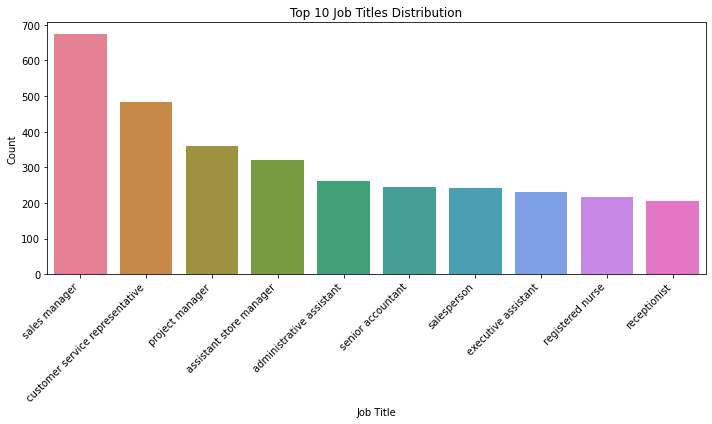

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the color palette
custom_palette = sns.color_palette("husl", 10)  # Example of a custom palette with 10 colors

plt.figure(figsize=(10, 6))
sns.countplot(x='title', data=df, order=df['title'].value_counts().index[:10], palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Job Titles Distribution')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

According to the dataset, there seems to be an insufficient amount of sales managerial workforce hence the search by the hiring teams/businesses. Consequently, there are higher chances of job seekers landing a sales manager position from the job postings. Customer service representative and project manager jobs follow through.

##### 2.Company Distribution

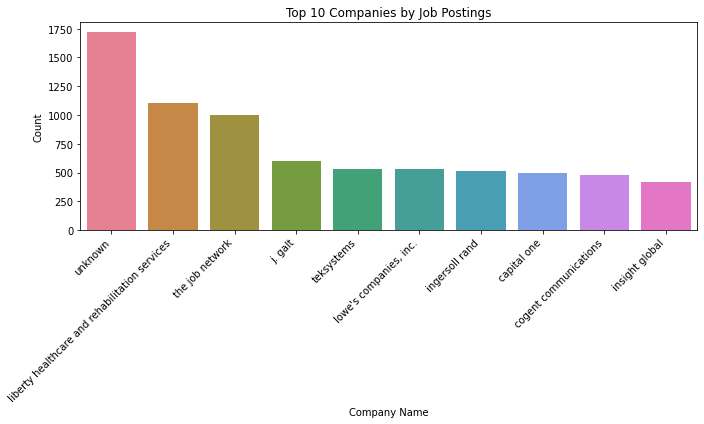

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='company_name', data=df, order=df['company_name'].value_counts().index[:10],palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Companies by Job Postings')
plt.xlabel('Company Name')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Top most companies seeking workforce is the Liberty Healthcare and Rehabilitation Services, with more than 2,500 instances. This translates to a limited skilled workforce and job sekers with skills relating to health and rehabilitation services have a higher probability of landing jobs here.

##### 3.Salary Distribution

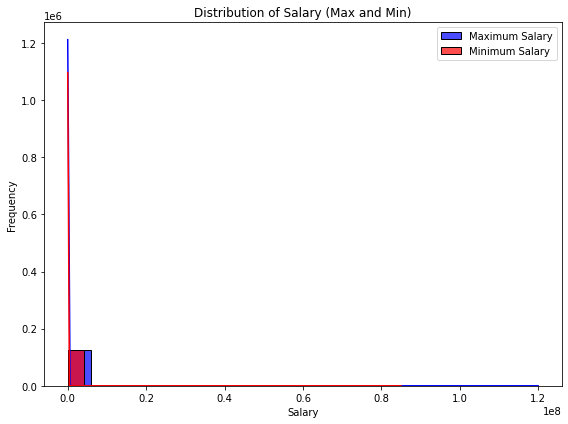

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(df['max_salary'], bins=20, kde=True, label='Maximum Salary', color='blue', alpha=0.7)
sns.histplot(df['min_salary'], bins=20, kde=True, label='Minimum Salary', color='red', alpha=0.7)
plt.title('Distribution of Salary (Max and Min)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

We proceeded to check the salary distribution that may help job seekers find motivation towards a particular job where most postings posted the minimum salary.

##### 4.Location Distribution

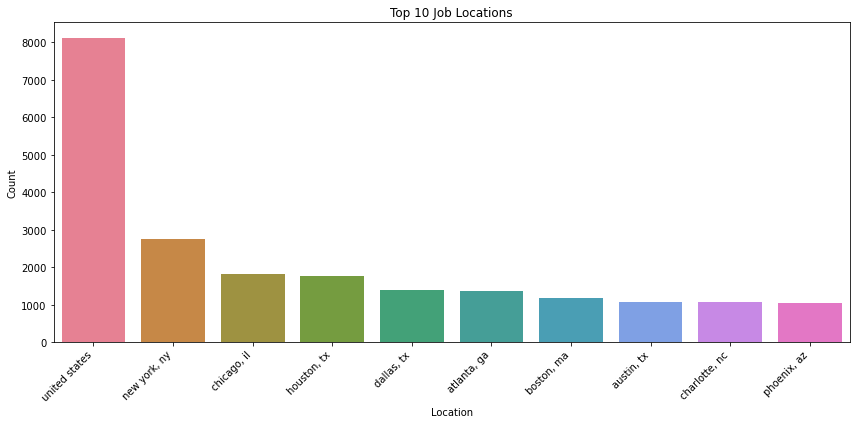

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(x='location', data=df, order=df['location'].value_counts().index[:10],palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Job Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Majority of the job postings are within the US capital, New York, followed closely by Chicago and Houston.

##### 5.Work_Type Distribution

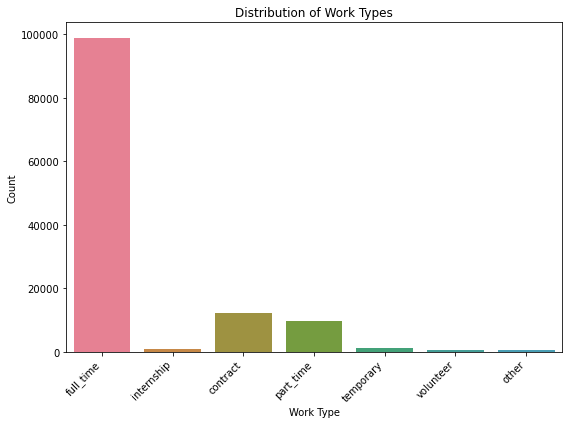

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x='work_type', data=df,palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Work Types')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


A high listing of the posted jobs require full time work force, relating to the labor-underserved companies. Jobs on contract and part-time follow through with very minimal chances of temporary jobs and internships indicating a need for permanent employees.

##### 6.Experience Level Distribution

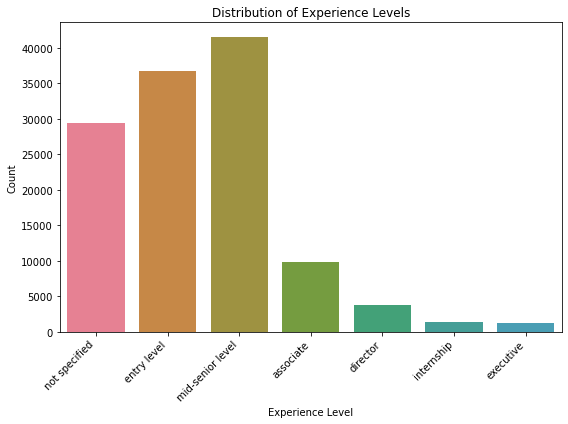

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x='formatted_experience_level', data=df,palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


A large portion of the job postings required job seekers who were at mid-senior level followed by entry level. Very few postings gave internships and executive positions.

##### 7.Currency Distribution

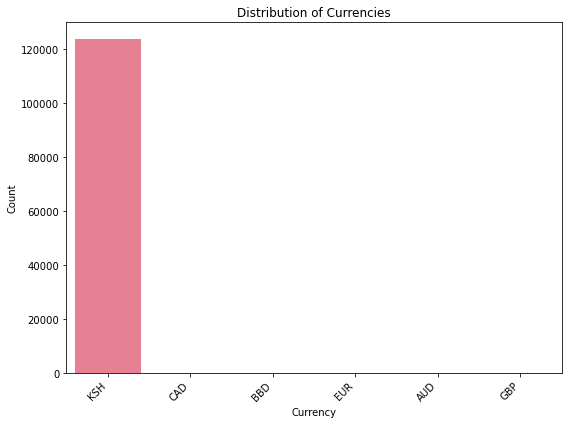

In [43]:
# Replace 'USD' with 'KSH' in the 'currency' column
df['currency'] = df['currency'].replace('USD', 'KSH')

plt.figure(figsize=(8, 6))
sns.countplot(x='currency', data=df,palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Currencies')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


All job postings gave a currency description of USD, previously. We however converted this to the Kenya shillings (KSh) to match Kenyan job seekers.

We further proceeded to understand different features relationship through bivariate analysis.

##### 1.Top 20 Job Titles with Most Applications

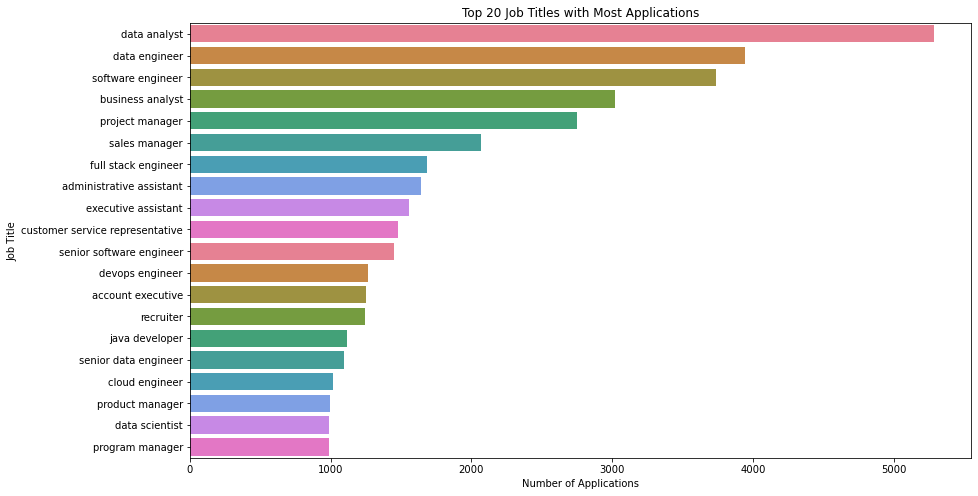

In [44]:
# Group by 'title' and sum the 'applies' column
title_applications = df.groupby('title')['applies'].sum().reset_index()

# Sort the results in descending order of applications
title_applications_sorted = title_applications.sort_values(by='applies', ascending=False)

# Select the top 10 job titles with the most applications
top_titles = title_applications_sorted.head(20)

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(data=top_titles, x='applies', y='title', palette=custom_palette)
plt.title('Top 20 Job Titles with Most Applications')
plt.xlabel('Number of Applications')
plt.ylabel('Job Title')
plt.show()


##### 2.Pay Period vs Max_salary

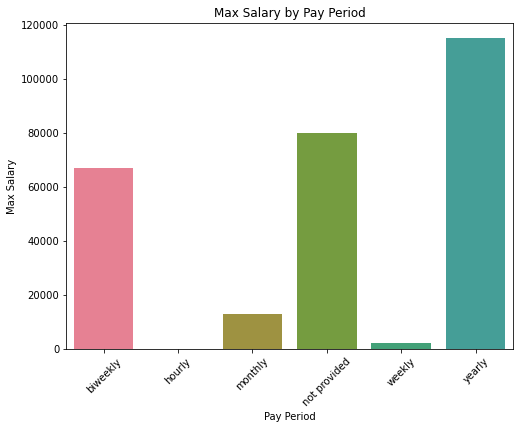

In [45]:
# Aggregate the data to get the median salary for each pay period
median_salary_by_pay_period = df.groupby('pay_period')['max_salary'].median().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=median_salary_by_pay_period, x='pay_period', y='max_salary', palette=custom_palette)
plt.title('Max Salary by Pay Period')
plt.xlabel('Pay Period')
plt.ylabel('Max Salary')
plt.xticks(rotation=45)
plt.show()


Most job postings define a salary pay period on annual basis followed by bi-wwekly. Monthly, weekly and hourly are quite few which may not favor most job seekers looking for such pay periods.

##### 3.Top 20 Job Titles with Most Views

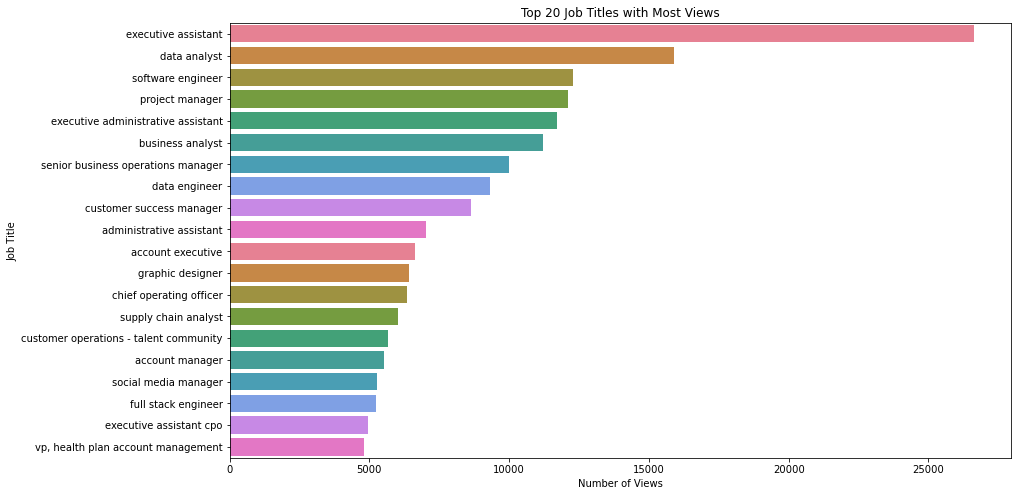

In [46]:
# Group by 'title' and sum the 'views' column
title_views = df.groupby('title')['views'].sum().reset_index()

# Sort the results in descending order of views
title_views_sorted = title_views.sort_values(by='views', ascending=False)

# Select the top 10 job titles with the most views
top_titles_views = title_views_sorted.head(20)

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(data=top_titles_views, x='views', y='title',palette=custom_palette)
plt.title('Top 20 Job Titles with Most Views')
plt.xlabel('Number of Views')
plt.ylabel('Job Title')
plt.show()

We observe here that jobs with high number of views lean towards data science jobs. This means that most job seekers viewing job postings have skills in data analysis/engineering/software. This could also mean that the job market is scaling up towards data science.

##### 4.Bottom 20 Job Titles with Least Views

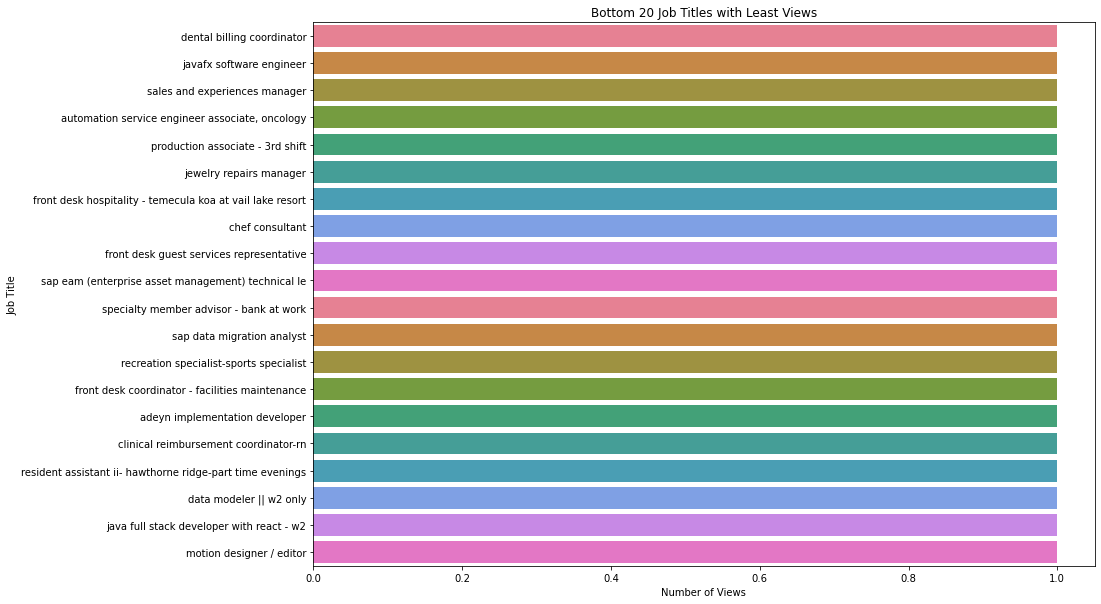

In [47]:
# Group by 'title' and sum the 'views' column
title_views = df.groupby('title')['views'].sum().reset_index()

# Sort the results in ascending order of views
title_views_sorted = title_views.sort_values(by='views', ascending=True)

# Select the bottom 20 job titles with the least views
bottom_titles_views = title_views_sorted.head(20)

# Plot the results
plt.figure(figsize=(14, 10))
sns.barplot(data=bottom_titles_views, x='views', y='title',palette=custom_palette)
plt.title('Bottom 20 Job Titles with Least Views')
plt.xlabel('Number of Views')
plt.ylabel('Job Title')
plt.show()


It is observed that jobs with least views lean more towards customer service.

##### 5.Average Minimum and Maximum Salaries by Experience Level

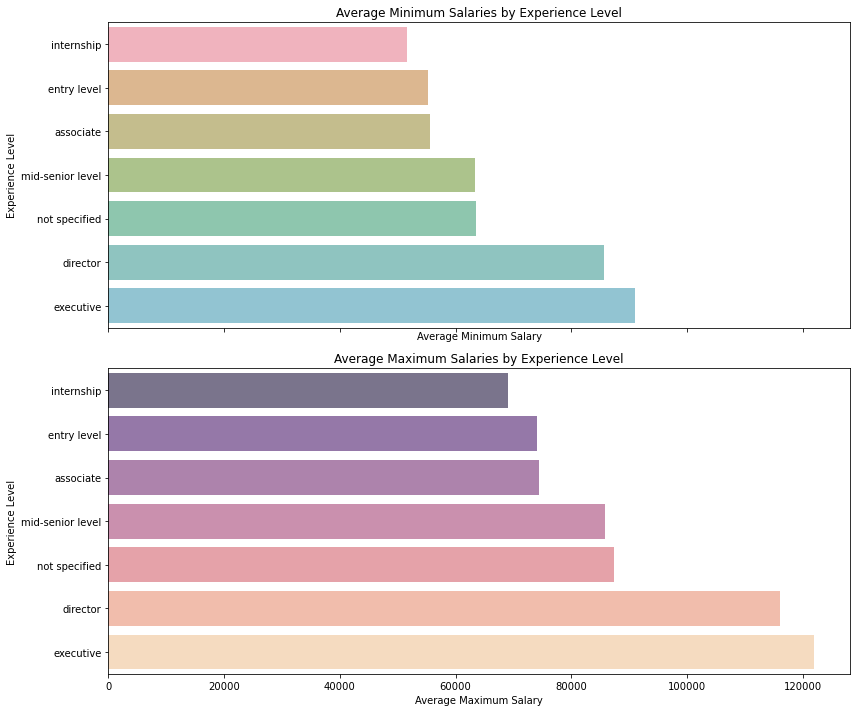

In [48]:

# Calculate average minimum and maximum salaries by experience level
average_salaries = df.groupby('formatted_experience_level')[['min_salary', 'max_salary']].mean().sort_values(by='min_salary')

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Create a bar plot for minimum salaries
sns.barplot(x=average_salaries['min_salary'], y=average_salaries.index,palette=custom_palette, ax=axs[0], alpha=0.6)
axs[0].set_title('Average Minimum Salaries by Experience Level')
axs[0].set_xlabel('Average Minimum Salary')
axs[0].set_ylabel('Experience Level')

# Create a bar plot for maximum salaries
sns.barplot(x=average_salaries['max_salary'], y=average_salaries.index, palette='magma', ax=axs[1], alpha=0.6)
axs[1].set_title('Average Maximum Salaries by Experience Level')
axs[1].set_xlabel('Average Maximum Salary')
axs[1].set_ylabel('Experience Level')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

There seems to be a natural fallout on reward by experience level, where the higher the experience, the higher the salary amount.

##### 6. Max Salary vs Min Salary by Experience level in Top Ten Companies

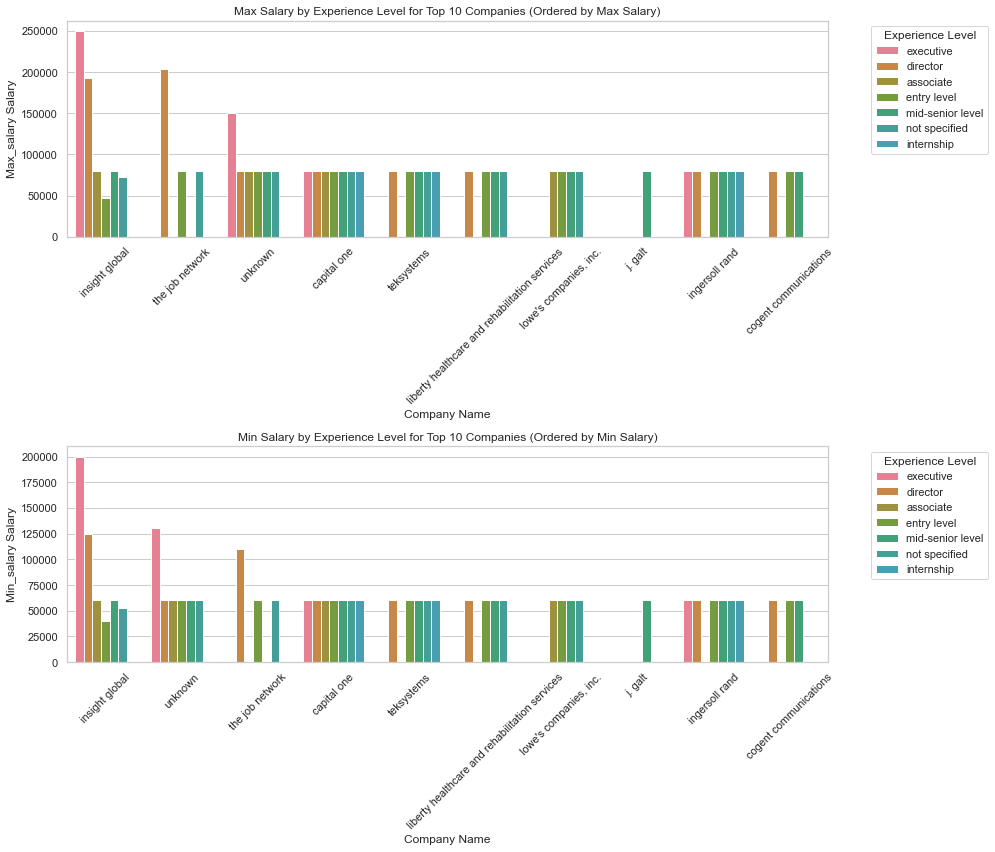

In [49]:
# Identify the top 10 companies by the number of job postings
top_companies = df['company_name'].value_counts().head(10).index

# Filter the DataFrame to include only these top companies
top_companies_df = df[df['company_name'].isin(top_companies)].copy()

# Ensure salaries are numeric
salary_columns = ['max_salary', 'min_salary']
top_companies_df.loc[:, salary_columns] = top_companies_df.loc[:, salary_columns].apply(pd.to_numeric, errors='coerce')

# Group by company and experience level, then calculate the median salary
grouped_df = top_companies_df.groupby(['company_name', 'formatted_experience_level'])[salary_columns].median().reset_index()

# Sort the DataFrame by max_salary in descending order
grouped_df_max = grouped_df.sort_values(by='max_salary', ascending=False)
# Sort the DataFrame by min_salary in descending order
grouped_df_min = grouped_df.sort_values(by='min_salary', ascending=False)

# Set the visual style of the plots
sns.set(style="whitegrid")

# Plot the results
plt.figure(figsize=(14, 12))

# Function to plot barplots
def plot_salary(df, salary_type, title, position):
    plt.subplot(2, 1, position)
    sns.barplot(data=df, x='company_name', y=salary_type, hue='formatted_experience_level',palette=custom_palette)
    plt.title(title)
    plt.xlabel('Company Name')
    plt.ylabel(salary_type.capitalize() + ' Salary')
    plt.xticks(rotation=45)
    plt.legend(title='Experience Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot max_salary
plot_salary(grouped_df_max, 'max_salary', 'Max Salary by Experience Level for Top 10 Companies (Ordered by Max Salary)', 1)

# Plot min_salary
plot_salary(grouped_df_min, 'min_salary', 'Min Salary by Experience Level for Top 10 Companies (Ordered by Min Salary)', 2)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


We observe that top companies with job postings have a maximum salary on the high positions. The salary amount decreases proportionately with decrease in chronological order of job positions.

##### 7.Location vs Jop posting Metrics

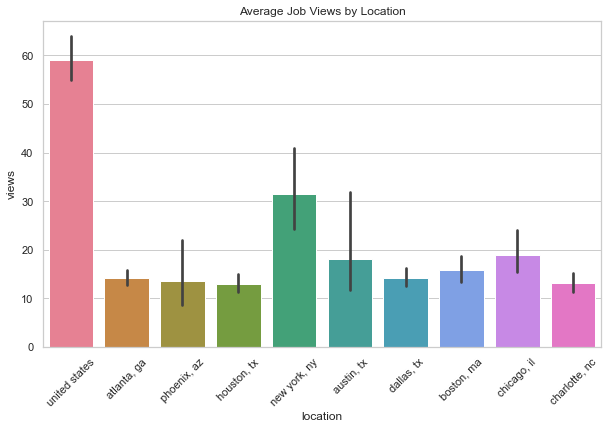

In [50]:
plt.figure(figsize=(10, 6))
top_locations = df['location'].value_counts().head(10).index
top_locations_df = df[df['location'].isin(top_locations)]

sns.barplot(data=top_locations_df, x='location', y='views', estimator=np.mean,palette=custom_palette)
plt.title('Average Job Views by Location')
plt.xticks(rotation=45)
plt.show()

There are more views on jobs across the capital, translating to high appetite of jobs within the capital. This could also translate to availability and accessibility of social amenities, work proximity, and other privileges. 

##### 8.Average Max Salary by Work Type

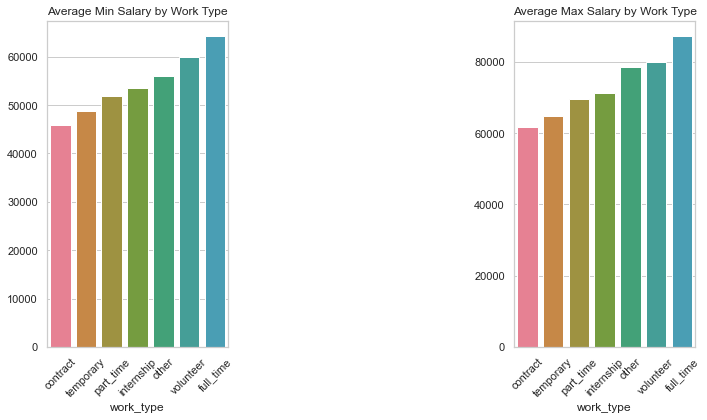

In [51]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
summary = df.groupby('work_type')['min_salary'].mean().sort_values()
sns.barplot(x=summary.index, y=summary.values,palette=custom_palette)
plt.title('Average Min Salary by Work Type')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
summary = df.groupby('work_type')['max_salary'].mean().sort_values()
sns.barplot(x=summary.index, y=summary.values,palette=custom_palette)
plt.title('Average Max Salary by Work Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


For both maximum and minimum salaries, full time jobs seem to be having highest pay while jobs on contracts have least payments.

##### 9.Views vs. Applies

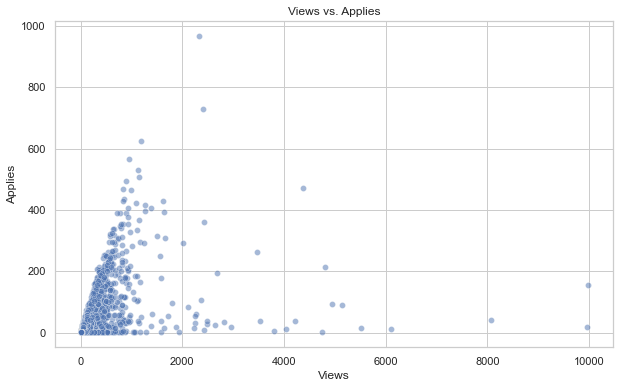

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='views', y='applies', alpha=0.5)
plt.title('Views vs. Applies')
plt.xlabel('Views')
plt.ylabel('Applies')
plt.show()

The intention of getting word clouds is to emphasize important phrases and themes in the job listings by visualizing the most prevalent and important words in the job titles/locations/skills description while removing less important ones. This can reveal information about the main areas of interest and typical employment roles in the dataset.

##### 10.Word Cloud of Job Titles

In [53]:
# from wordcloud import WordCloud, STOPWORDS
# #  additional stopwords for the three wordclouds below:

# additional_stopwords = {"part", "time", "specialist", "HR","Hybrid", "Senior","Sr","Bonus", "Contract", "Entry",
#                         "Day","perfom", "made","must", "experience","use","knowledge", "apply", "role", 
#                         "employee", "change","application", "following","position", "requires","ability","skills",
#                         "Level", "full" ,"NY" ,"rn" ,"2nd","Remote","Lead","II","United","States","shift"}  

# stopwords = set(STOPWORDS).union(additional_stopwords)

# wordcloud = WordCloud(stopwords=stopwords,width=800, height=400, background_color='black').generate(' '.join(df["title"]))


In [54]:
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud of Job Titles')
# plt.show()

##### 11.Word Cloud of Job location

In [55]:
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud of Job location')
# plt.show()

##### 12.Word Cloud of Skills Description

In [56]:
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud of Skills Description')
# plt.show()

In [57]:
df.columns


Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'views', 'min_salary', 'applies',
       'formatted_experience_level', 'listed_time', 'work_type', 'currency',
       'description_length', 'calculated_expiry_date', 'is_expired'],
      dtype='object')

### Correlation Analysis

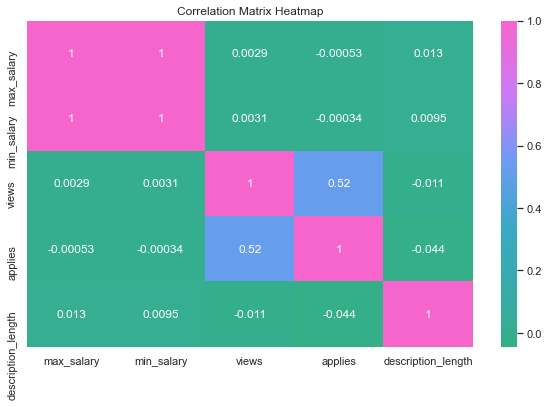

In [58]:
from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', custom_palette)

# Compute the correlation matrix
correlation_matrix = df[['max_salary', 'min_salary', 'views', 'applies', 'description_length']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

The goal of the above correlation matrix is to visualize the relationships between max_salary, min_salary, views, applies, and description_length using a heatmap. The heatmap provides an intuitive way to see which variables are positively or negatively correlated and the strength of these correlations. This can help identify patterns and relationships within the data that may be useful for further analysis or decision-making.

We however don't observe any positive correlation among the stated columns. 

In [59]:
# Pearson Correlation
correlation_matrix = df[['max_salary', 'min_salary', 'views', 'applies','description_length']].corr(method='pearson')
print(correlation_matrix)

# Spearman Rank Correlation
spearman_corr = df[['max_salary', 'min_salary', 'views', 'applies','description_length']].corr(method='spearman')
spearman_corr


                    max_salary  min_salary  views  applies  description_length
max_salary                   1           1      0       -0                   0
min_salary                   1           1      0       -0                   0
views                        0           0      1        1                  -0
applies                     -0          -0      1        1                  -0
description_length           0           0     -0       -0                   1


,max_salary,min_salary,views,applies,description_length
max_salary,1,1,0,0,0
min_salary,1,1,0,0,0
views,0,0,1,0,0
applies,0,0,0,1,-0
description_length,0,0,0,-0,1


In [60]:
df.shape


(123849, 17)

#### Feature Engineering
This process helps transform raw data into features that can be used in machine learning models. We did this to identify columns that guide the selection of features for training machine learning models. 

In [61]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'views', 'min_salary', 'applies',
       'formatted_experience_level', 'listed_time', 'work_type', 'currency',
       'description_length', 'calculated_expiry_date', 'is_expired'],
      dtype='object')

In [62]:
# Convert date columns to datetime
df['listed_time'] = pd.to_datetime(df['listed_time'])
df['calculated_expiry_date'] = pd.to_datetime(df['calculated_expiry_date'])
df['days_since_posted'] = (pd.Timestamp.now() - df['listed_time']).dt.days


#### Data PreProcessing
Data preprocessing is a crucial step for preparing the data in a consistent and systematic way, which is essential for building reliable and accurate machine learning models.

It ensures that the numerical features are standardized, which is often required for many machine learning algorithms.
It further transforms categorical features into a format that can be used by machine learning models.

This was achieved through scaling the data, onehotencoding and ordinalencoding, then transforming the data.

In [63]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Print column names for debugging
print("DataFrame columns:", df.columns.tolist())

# Define categorical and numerical columns (ensure these exist in df)
categorical_columns = ['formatted_experience_level', 'pay_period', 'work_type']
numerical_columns = ['max_salary', 'min_salary','views','applies']

# Verify that all columns exist in df
numerical_columns = [col for col in numerical_columns if col in df.columns]
categorical_columns = [col for col in categorical_columns if col in df.columns]

print("Verified numerical columns:", numerical_columns)
print("Verified categorical columns:", categorical_columns)

# Define transformers for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat_nom', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), 
         [col for col in categorical_columns if col in ['company_name', 'location', 'currency', 'work_type']]),  # Nominal categorical features
        ('cat_ord', OrdinalEncoder(), 
         [col for col in categorical_columns if col in ['formatted_experience_level', 'pay_period']])  # Ordinal categorical features
    ])


DataFrame columns: ['job_id', 'company_name', 'title', 'description', 'max_salary', 'pay_period', 'location', 'views', 'min_salary', 'applies', 'formatted_experience_level', 'listed_time', 'work_type', 'currency', 'description_length', 'calculated_expiry_date', 'is_expired', 'days_since_posted']
Verified numerical columns: ['max_salary', 'min_salary', 'views', 'applies']
Verified categorical columns: ['formatted_experience_level', 'pay_period', 'work_type']


In [64]:
import pandas as pd


# Define the threshold for high vs. low application likelihood
threshold = df['applies'].median()  # You can adjust this threshold as needed

# Create the binary target variable
df['high_application_likelihood'] = (df['applies'] > threshold).astype(int)

# Check the new DataFrame
print(df[['applies', 'high_application_likelihood']].head())

# Ensure the target variable contains both 0 and 1
value_counts = df['high_application_likelihood'].value_counts()
print("Value counts of the target variable:\n", value_counts)

# Check if both 0 and 1 are present
if value_counts.get(0, 0) > 0 and value_counts.get(1, 0) > 0:
    print("Both 0 and 1 are present in the target variable.")
else:
    print("The target variable does not contain both classes. Adjust the threshold or investigate further.")


   applies  high_application_likelihood
0        2                            0
1        3                            0
2        3                            0
3        3                            0
4        3                            0
Value counts of the target variable:
 0    113763
1     10086
Name: high_application_likelihood, dtype: int64
Both 0 and 1 are present in the target variable.


This approach helps ensure that the dataset is ready for binary classification tasks, allowing us to analyze and model the likelihood of job postings receiving high or low numbers of applications.

From the above, so far, we see that there is a likelihood of getting low numbers of applications.

All the values in 'high_application_likelihood' are 0, indicating that these job postings have a low application likelihood (below the median threshold).

There are 113,763 instances with a high_application_likelihood of 0 (low application likelihood).
There are 10,086 instances with a high_application_likelihood of 1 (high application likelihood).
This shows that the majority of the job postings have a low application likelihood, while a smaller subset has a high application likelihood.

The code confirms that both classes (0 and 1) are present in the high_application_likelihood target variable, which is important for training a binary classification model.

The data shows a significant class imbalance, with many more instances of class 0 (low application likelihood) than class 1 (high application likelihood).
This class imbalance could affect the performance of a machine learning model, as it might become biased towards the majority class. This we proceed to examine and address.

In [65]:
## Setting the X and y variables

In [66]:
# Define features (X) and target (y)
X = df.drop(columns=['job_id', 'applies', 'title', 'description', 'high_application_likelihood'])  # Exclude non-predictive columns and the new target variable
y = df['high_application_likelihood']  # Use the new binary target variable

# Verify the class distribution in the target variable
print(df['high_application_likelihood'].value_counts())

0    113763
1     10086
Name: high_application_likelihood, dtype: int64


In [67]:
## Checking for Class Imbalance

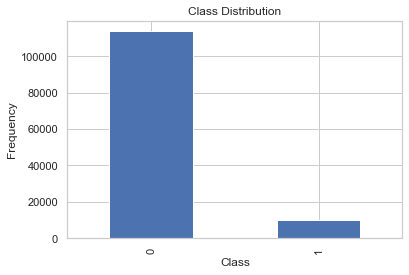

0    113763
1     10086
Name: high_application_likelihood, dtype: int64


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the target variable
y.value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Print class distribution
print(y.value_counts())


In [ ]:
## Cross validation

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# import numpy as np

# # Update with actual column names
# numeric_features = ['actual_numeric_feature1', 'actual_numeric_feature2']
# categorical_features = ['actual_categorical_feature1', 'actual_categorical_feature2']

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)])

# def cross_validate_model(model, X, y, cv_folds=5):
#     cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                ('classifier', model)])
    
#     accuracies = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
#     precisions = cross_val_score(pipeline, X, y, cv=cv, scoring='precision')
#     recalls = cross_val_score(pipeline, X, y, cv=cv, scoring='recall')
#     f1_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')
#     roc_auc_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')
    
#     return {
#         'Accuracy': (np.mean(accuracies), np.std(accuracies)),
#         'Precision': (np.mean(precisions), np.std(precisions)),
#         'Recall': (np.mean(recalls), np.std(recalls)),
#         'F1 Score': (np.mean(f1_scores), np.std(f1_scores)),
#         'ROC AUC Score': (np.mean(roc_auc_scores), np.std(roc_auc_scores))
#     }

# results = {}

# for model_name, model in models.items():
#     print(f"Cross-validating {model_name}...")
#     results[model_name] = cross_validate_model(model, X, y)

# # Print results
# for model_name, metrics in results.items():
#     print(f"\n{model_name}:")
#     for metric, (mean, std) in metrics.items():
#         print(f"  {metric}: Mean = {mean:.4f}, Std = {std:.4f}")


In [69]:
# Splitting the dataframe

In [70]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

# Sample the DataFrame
df = df.sample(1000)

# Define features (X) and target (y)
X = df.drop(columns=['job_id', 'applies', 'title', 'description', 'high_application_likelihood'])  # Exclude non-predictive columns and the target variable
y = df['high_application_likelihood']  # Use the new binary target variable

# Verify the class distribution in the target variable
print(df['high_application_likelihood'].value_counts())

# Define categorical and numerical columns
categorical_columns = ['formatted_experience_level', 'pay_period', 'work_type']
numerical_columns = ['max_salary', 'min_salary', 'views']

# Verify columns exist in the DataFrame
numerical_columns = [col for col in numerical_columns if col in df.columns]
categorical_columns = [col for col in categorical_columns if col in df.columns]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure categorical columns are treated properly
all_categorical_columns = [col for col in categorical_columns if col in X.columns]

# Define transformers for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat_nom', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         [col for col in all_categorical_columns if col in ['company_name', 'location', 'currency', 'work_type']]),  # Nominal categorical features
        ('cat_ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), 
         [col for col in all_categorical_columns if col in ['formatted_experience_level', 'pay_period']])  # Ordinal categorical features
    ],
    remainder='drop'
)

# Fit and transform the training data, transform the test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


0    924
1     76
Name: high_application_likelihood, dtype: int64


In [71]:
## Random Forest

In [72]:
# from imblearn.over_sampling import SMOTE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, f1_score, roc_auc_score
# import matplotlib.pyplot as plt
# import numpy as np

# # Define the number of neighbors for SMOTE based on the number of minority class samples
# minority_class_count = sum(y_train == 1)
# k_neighbors = min(minority_class_count - 1, 5) if minority_class_count > 1 else 1

# # Initialize the SMOTE instance with the calculated number of neighbors
# smote = SMOTE(k_neighbors=k_neighbors, random_state=42)

# # Apply SMOTE to the training data
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# # Initialize the Random Forest model with class weight adjustment
# model = RandomForestClassifier(class_weight='balanced', random_state=42)

# # Train the model on the resampled data
# model.fit(X_train_resampled, y_train_resampled)

# # Make predictions
# y_pred = model.predict(X_test_preprocessed)
# y_proba = model.predict_proba(X_test_preprocessed)[:, 1]  # Probabilities for ROC AUC

# # Evaluate the model
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("F1 Score:", f1_score(y_test, y_pred))
# print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# # Visualize the confusion matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# conf_matrix = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
# disp.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       189
           1       0.50      1.00      0.67        11

    accuracy                           0.94       200
   macro avg       0.75      0.97      0.82       200
weighted avg       0.97      0.94      0.95       200

F1 Score: 0.6666666666666666
ROC AUC Score: 0.9867724867724869


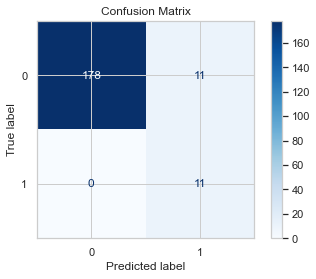

In [73]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize the RandomUnderSampler instance
rus = RandomUnderSampler(random_state=42)

# Apply RandomUnderSampler to the training data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_preprocessed, y_train)

# Initialize the Random Forest model with class weight adjustment
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model on the resampled data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test_preprocessed)
y_proba = model.predict_proba(X_test_preprocessed)[:, 1]  # Probabilities for ROC AUC

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [74]:
## Logistic Regression Model

Model: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       189
           1       0.90      0.82      0.86        11

    accuracy                           0.98       200
   macro avg       0.94      0.91      0.92       200
weighted avg       0.98      0.98      0.98       200

Accuracy: 0.985
Precision: 0.9
Recall: 0.8181818181818182
F1 Score: 0.8571428571428572
ROC AUC Score: 0.9937469937469937
Confusion Matrix:
 [[188   1]
 [  2   9]]


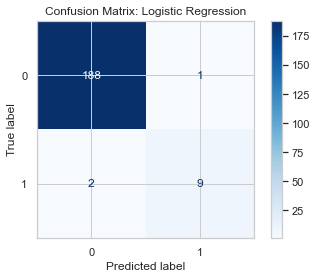

------------------------------------------------------------


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the Logistic Regression model
log_reg = LogisticRegression()

def train_and_evaluate(model, model_name):
    # Train the model
    model.fit(X_train_preprocessed, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_preprocessed)
    y_proba = model.predict_proba(X_test_preprocessed)[:, 1]  # Probabilities for ROC AUC
    
    # Print model name
    print(f"Model: {model_name}")
    
    # Print classification report (includes precision, recall, and F1-score)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Print additional metrics
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    
    # Calculate and print ROC AUC score only if there are at least two unique classes in y_test
    if len(set(y_test)) > 1:
        print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
    else:
        print("ROC AUC Score: Not defined (only one class present in y_test)")
    
    # Print and visualize confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Visualize the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

    # Separator for readability
    print("-" * 60)

# Train and evaluate Logistic Regression
train_and_evaluate(log_reg, "Logistic Regression")


In [76]:
## Analysing the model results

In [77]:
### KNN Model

Model: K-Nearest Neighbors
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       189
           1       0.48      1.00      0.65        11

    accuracy                           0.94       200
   macro avg       0.74      0.97      0.81       200
weighted avg       0.97      0.94      0.95       200

Accuracy: 0.94
Precision: 0.4782608695652174
Recall: 1.0
F1 Score: 0.6470588235294118
ROC AUC Score: 0.9891774891774893
Confusion Matrix:
 [[177  12]
 [  0  11]]


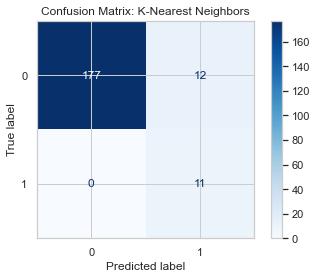

------------------------------------------------------------


In [78]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

# Apply the preprocessor to the features
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Determine the number of samples in each class
class_counts = y_train.value_counts()
minority_class_count = class_counts.min()
majority_class_count = class_counts.max()

# Ensure k_neighbors does not exceed the number of samples in the minority class
k_neighbors = min(minority_class_count - 1, 5) if minority_class_count > 1 else 1  # Use minority_class_count - 1 to account for the point itself

# Initialize SMOTE with appropriate k_neighbors
smote = SMOTE(k_neighbors=k_neighbors, random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the KNN model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Print evaluation metrics
print("Model: K-Nearest Neighbors")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print additional metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Print and visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: K-Nearest Neighbors')
plt.show()

# Separator for readability
print("-" * 60)


In [79]:
### Support Vector Machine Model

0    924
1     76
Name: high_application_likelihood, dtype: int64
Model: Support Vector Machine
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       189
           1       0.83      0.91      0.87        11

    accuracy                           0.98       200
   macro avg       0.91      0.95      0.93       200
weighted avg       0.99      0.98      0.99       200

Accuracy: 0.985
Precision: 0.8333333333333334
Recall: 0.9090909090909091
F1 Score: 0.8695652173913043
ROC AUC Score: 0.9951899951899952
Confusion Matrix:
 [[187   2]
 [  1  10]]


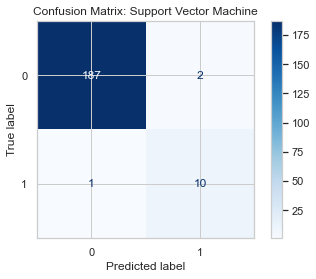

------------------------------------------------------------


In [80]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load your data
# df = pd.read_csv('your_data.csv')  # Replace with your data loading method

# Define features (X) and target (y)
X = df.drop(columns=['job_id', 'applies', 'title', 'description', 'high_application_likelihood'])  # Exclude non-predictive columns and the new target variable
y = df['high_application_likelihood']  # Use the new binary target variable

# Verify the class distribution in the target variable
print(df['high_application_likelihood'].value_counts())

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Convert data types
for col in categorical_features:
    X[col] = X[col].astype('object')

for col in numeric_features:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Handle missing values
X = X.fillna(method='ffill')

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the preprocessor to the features
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Determine the number of samples in each class
class_counts = y_train.value_counts()
minority_class_count = class_counts.min()
majority_class_count = class_counts.max()

# Ensure k_neighbors does not exceed the number of samples in the minority class
k_neighbors = min(minority_class_count - 1, 5) if minority_class_count > 1 else 1  # Use minority_class_count - 1 to account for the point itself

# Initialize SMOTE with appropriate k_neighbors
smote = SMOTE(k_neighbors=k_neighbors, random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the SVM model
svm = SVC(probability=True, random_state=42)

# Train the model
svm.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = svm.predict(X_test)
y_proba = svm.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Print evaluation metrics
print("Model: Support Vector Machine")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print additional metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Print and visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Support Vector Machine')
plt.show()

# Separator for readability
print("-" * 60)




In [81]:
### Naive Bayes

0    924
1     76
Name: high_application_likelihood, dtype: int64
Model: Naive Bayes
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.58      0.72       189
           1       0.06      0.45      0.11        11

    accuracy                           0.57       200
   macro avg       0.50      0.52      0.41       200
weighted avg       0.90      0.57      0.69       200

Accuracy: 0.575
Precision: 0.05952380952380952
Recall: 0.45454545454545453
F1 Score: 0.10526315789473684
ROC AUC Score: 0.5182780182780183
Confusion Matrix:
 [[110  79]
 [  6   5]]


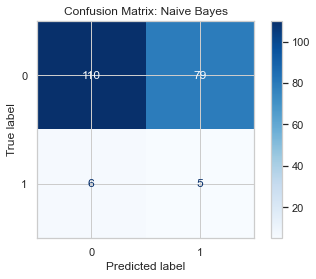

------------------------------------------------------------


In [82]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load your data
# df = pd.read_csv('your_data.csv')  # Replace with your data loading method

# Define features (X) and target (y)
X = df.drop(columns=['job_id', 'applies', 'title', 'description', 'high_application_likelihood'])  # Exclude non-predictive columns and the new target variable
y = df['high_application_likelihood']  # Use the new binary target variable

# Verify the class distribution in the target variable
print(df['high_application_likelihood'].value_counts())

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Convert data types
for col in categorical_features:
    X[col] = X[col].astype('object')

for col in numeric_features:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Handle missing values
X = X.fillna(method='ffill')

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the preprocessor to the features
X_preprocessed = preprocessor.fit_transform(X).toarray()  # Convert to dense array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Determine the number of samples in each class
class_counts = y_train.value_counts()
minority_class_count = class_counts.min()

# Ensure k_neighbors does not exceed the number of samples in the minority class
k_neighbors = min(minority_class_count - 1, 5) if minority_class_count > 1 else 1  # Use minority_class_count - 1 to account for the point itself

# Initialize SMOTE with appropriate k_neighbors
smote = SMOTE(k_neighbors=k_neighbors, random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Naive Bayes model
nb = GaussianNB()

# Train the model
nb.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = nb.predict(X_test)
y_proba = nb.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Print evaluation metrics
print("Model: Naive Bayes")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print additional metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Print and visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=nb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Naive Bayes')
plt.show()

# Separator for readability
print("-" * 60)


In [83]:
## XG Boost Model

0    924
1     76
Name: high_application_likelihood, dtype: int64
[20:43:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Model: XGBoost
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       189
           1       0.61      1.00      0.76        11

    accuracy                           0.96       200
   macro avg       0.81      0.98      0.87       200
weighted avg       0.98      0.96      0.97       200

Accuracy: 0.965
Precision: 0.6111111111111112
Recall: 1.0
F1 Score: 0.7586206896551725
ROC AUC Score: 0.9956709956709956
Confusion Matrix:
 [[182   7]
 [  0  11]]


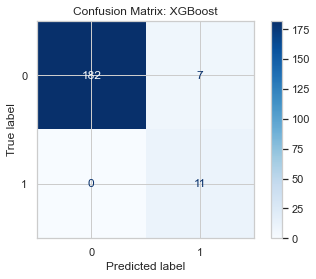

------------------------------------------------------------


In [84]:
# Ensure xgboost is installed
!pip install xgboost

import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load your data
# df = pd.read_csv('your_data.csv')  # Replace with your data loading method

# Define features (X) and target (y)
X = df.drop(columns=['job_id', 'applies', 'title', 'description', 'high_application_likelihood'])  # Exclude non-predictive columns and the new target variable
y = df['high_application_likelihood']  # Use the new binary target variable

# Verify the class distribution in the target variable
print(df['high_application_likelihood'].value_counts())

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Convert data types
for col in categorical_features:
    X[col] = X[col].astype('object')

for col in numeric_features:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Handle missing values
X = X.fillna(method='ffill')

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the preprocessor to the features
X_preprocessed = preprocessor.fit_transform(X).toarray()  # Convert to dense array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Determine the number of samples in each class
class_counts = y_train.value_counts()
minority_class_count = class_counts.min()

# Ensure k_neighbors does not exceed the number of samples in the minority class
k_neighbors = min(minority_class_count - 1, 5) if minority_class_count > 1 else 1  # Use minority_class_count - 1 to account for the point itself

# Initialize SMOTE with appropriate k_neighbors
smote = SMOTE(k_neighbors=k_neighbors, random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Print evaluation metrics
print("Model: XGBoost")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print additional metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Print and visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: XGBoost')
plt.show()

# Separator for readability
print("-" * 60)


In [85]:
### Decision Tree Model

0    924
1     76
Name: high_application_likelihood, dtype: int64
Model: Decision Tree
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       189
           1       0.59      0.91      0.71        11

    accuracy                           0.96       200
   macro avg       0.79      0.94      0.85       200
weighted avg       0.97      0.96      0.96       200

Accuracy: 0.96
Precision: 0.5882352941176471
Recall: 0.9090909090909091
F1 Score: 0.7142857142857143
ROC AUC Score: 0.9360269360269362
Confusion Matrix:
 [[182   7]
 [  1  10]]


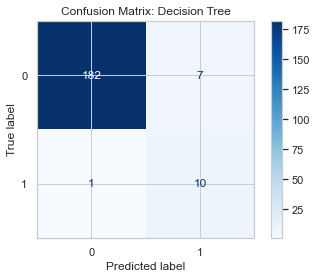

------------------------------------------------------------


In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load your data
# df = pd.read_csv('your_data.csv')  # Replace with your data loading method

# Define features (X) and target (y)
X = df.drop(columns=['job_id', 'applies', 'title', 'description', 'high_application_likelihood'])  # Exclude non-predictive columns and the new target variable
y = df['high_application_likelihood']  # Use the new binary target variable

# Verify the class distribution in the target variable
print(df['high_application_likelihood'].value_counts())

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Convert data types
for col in categorical_features:
    X[col] = X[col].astype('object')

for col in numeric_features:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Handle missing values
X = X.fillna(method='ffill')

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the preprocessor to the features
X_preprocessed = preprocessor.fit_transform(X).toarray()  # Convert to dense array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Determine the number of samples in each class
class_counts = y_train.value_counts()
minority_class_count = class_counts.min()

# Ensure k_neighbors does not exceed the number of samples in the minority class
k_neighbors = min(minority_class_count - 1, 5) if minority_class_count > 1 else 1  # Use minority_class_count - 1 to account for the point itself

# Initialize SMOTE with appropriate k_neighbors
smote = SMOTE(k_neighbors=k_neighbors, random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = decision_tree_model.predict(X_test)
y_proba = decision_tree_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Print evaluation metrics
print("Model: Decision Tree")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print additional metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Print and visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=decision_tree_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Decision Tree')
plt.show()

# Separator for readability
print("-" * 60)


In [87]:
### Model Performance Comparison

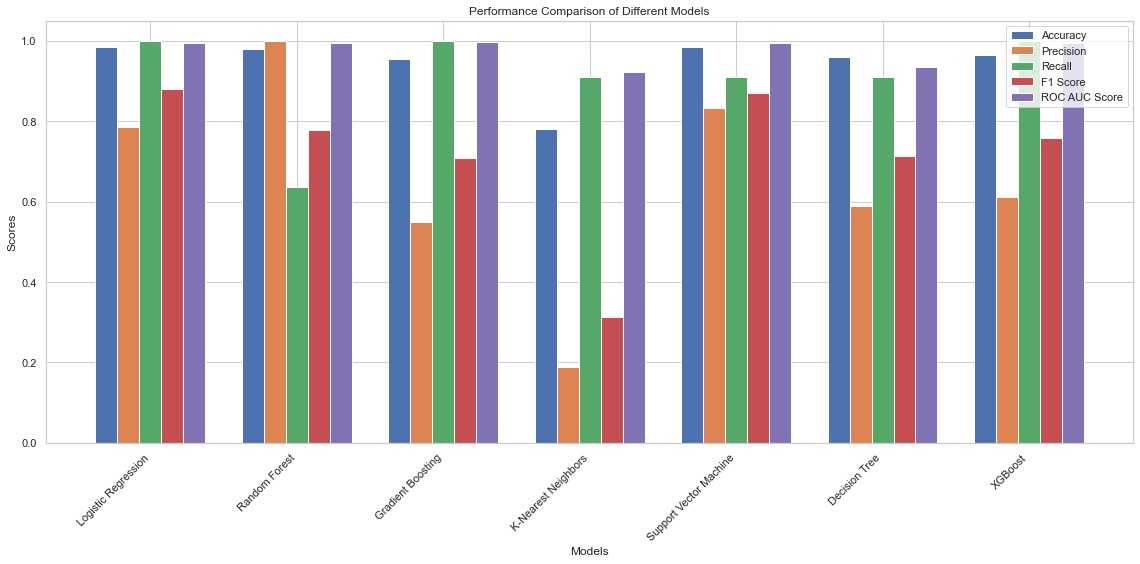

In [99]:
# Convert metrics to a DataFrame for easy plotting
metrics_df = pd.DataFrame(metrics)

# Plot the metrics
fig, ax = plt.subplots(figsize=(16, 8))

# Set positions and width for the bars
positions = np.arange(len(metrics_df['Model']))
width = 0.15  # Adjusted width for better spacing

# Plot each metric
bar1 = ax.bar(positions - 2*width, metrics_df['Accuracy'], width, label='Accuracy')
bar2 = ax.bar(positions - width, metrics_df['Precision'], width, label='Precision')
bar3 = ax.bar(positions, metrics_df['Recall'], width, label='Recall')
bar4 = ax.bar(positions + width, metrics_df['F1 Score'], width, label='F1 Score')
bar5 = ax.bar(positions + 2*width, metrics_df['ROC AUC Score'], width, label='ROC AUC Score')

# Add labels, title and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Different Models')
ax.set_xticks(positions)
ax.set_xticklabels(metrics_df['Model'], rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [101]:
# Best Performing Model

In [108]:
def print_best_model_by_f1_score(metrics_df):
    # Ensure metrics_df is a DataFrame and contains the 'F1 Score' column
    if 'F1 Score' not in metrics_df.columns:
        print("F1 Score column not found in metrics DataFrame.")
        return

    # Find the index of the model with the highest F1 Score
    best_model_index = metrics_df['F1 Score'].idxmax()
    
    # Get the best model name and F1 Score
    best_model_name = metrics_df.loc[best_model_index, 'Model']
    best_f1_score = metrics_df.loc[best_model_index, 'F1 Score']
    
    # Print the best model and its F1 Score
    print(f"The best performing model based on F1 Score is {best_model_name} with an F1 Score of {best_f1_score:.4f}.")

# Example usage
print_best_model_by_f1_score(metrics_df)


The best performing model based on F1 Score is Logistic Regression with an F1 Score of 0.8800.


In [ ]:
# Best Performing model based on a combined score (F1 Score, ROC AUC Score)

In [109]:
def print_best_model_by_combined_metrics(metrics_df):
    # Ensure metrics_df is a DataFrame and contains the necessary columns
    required_columns = ['F1 Score', 'ROC AUC Score']
    for column in required_columns:
        if column not in metrics_df.columns:
            print(f"{column} column not found in metrics DataFrame.")
            return

    # Normalize scores for comparison
    metrics_df['F1 Score (Normalized)'] = metrics_df['F1 Score'] / metrics_df['F1 Score'].max()
    metrics_df['ROC AUC Score (Normalized)'] = metrics_df['ROC AUC Score'] / metrics_df['ROC AUC Score'].max()

    # Calculate combined score (you can adjust weights if needed)
    metrics_df['Combined Score'] = (0.5 * metrics_df['F1 Score (Normalized)'] +
                                    0.5 * metrics_df['ROC AUC Score (Normalized)'])

    # Find the index of the model with the highest combined score
    best_model_index = metrics_df['Combined Score'].idxmax()
    
    # Get the best model name and its combined score
    best_model_name = metrics_df.loc[best_model_index, 'Model']
    best_combined_score = metrics_df.loc[best_model_index, 'Combined Score']
    
    # Print the best model and its combined score
    print(f"The best performing model based on combined metrics is {best_model_name} with a Combined Score of {best_combined_score:.4f}.")

# Example usage
print_best_model_by_combined_metrics(metrics_df)


The best performing model based on combined metrics is Logistic Regression with a Combined Score of 0.9977.


In [ ]:
#### ROC Curve Comparison

In [128]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# # Assuming 'X' is your feature matrix and contains categorical columns
# categorical_features = ['categorical_feature1', 'categorical_feature2']  # Update with your categorical columns
# numeric_features = ['numeric_feature1', 'numeric_feature2']  # Update with your numeric columns

# # Preprocessing for numerical data
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())])

# # Preprocessing for categorical data
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# # Combine preprocessing steps
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)])

# # Fit and transform the data
# X_preprocessed = preprocessor.fit_transform(X)
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, roc_auc_score
# from sklearn.base import clone

# def plot_roc_curves(models, X, y):
#     plt.figure(figsize=(12, 8))
    
#     for model_name, model in models.items():
#         # Clone model to avoid refitting the same model multiple times
#         model_clone = clone(model)
        
#         # Fit model
#         model_clone.fit(X, y)
        
#         # Predict probabilities
#         y_proba = model_clone.predict_proba(X)[:, 1]  # Probabilities for the positive class
        
#         # Compute ROC curve
#         fpr, tpr, _ = roc_curve(y, y_proba)
#         roc_auc = roc_auc_score(y, y_proba)
        
#         # Plot ROC curve
#         plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
#     plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC) Curves')
#     plt.legend(loc='lower right')
#     plt.grid(True)
#     plt.show()

# # Assuming 'models' is a dictionary of model names and model instances
# # Plot ROC curves with preprocessed data
# plot_roc_curves(models, X_preprocessed, y)


In [124]:
## Hypertuning the Best Performing Model _logistic Regression Model

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# # Define the parameter grid
# param_grid = {
#     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'classifier__penalty': ['l1', 'l2', 'elasticnet'],
#     'classifier__l1_ratio': [0, 0.5, 1],  # Only used if penalty='elasticnet'
#     'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# }

# # Initialize Logistic Regression
# log_reg = LogisticRegression(max_iter=10000)

# # Create a pipeline
# pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                            ('classifier', log_reg)])

# # Initialize GridSearchCV
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Fit the model
# grid_search.fit(X, y)

# # Print best parameters and score
# print("Best parameters found: ", grid_search.best_params_)
# print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))


In [ ]:
# def print_feature_importances(model, model_name, preprocessor, X_train_df):
#     # Fit the preprocessor and transform the training data
#     X_train_transformed = preprocessor.fit_transform(X_train_df)
    
#     # Extract feature names
#     num_features = numerical_columns
#     onehotencoder = preprocessor.named_transformers_['cat_nom']
#     onehot_features = onehotencoder.get_feature_names_out(
#         [col for col in categorical_columns if col not in ['formatted_experience_level', 'pay_period']]
#     )
#     ordinal_features = [f"{col}_ord" for col in ['formatted_experience_level', 'pay_period']]
#     feature_names = num_features + list(onehot_features) + ordinal_features
    
#     # Print feature importances
#     if hasattr(model, 'feature_importances_'):
#         importances = model.feature_importances_
#         indices = importances.argsort()[::-1]
#         print(f"Feature importances for {model_name}:")
#         for i in indices:
#             print(f"{feature_names[i]}: {importances[i]:.4f}")
#         print("-" * 60)
#     else:
#         print(f"{model_name} does not have feature importances")

# # Example usage with a DataFrame
# # Convert X_train to a DataFrame with appropriate feature names
# X_train_df = pd.DataFrame(X_train, columns=feature_names)

# # Train models
# random_forest.fit(X_train_df, y_train)
# gradient_boosting.fit(X_train_df, y_train)

# # Print feature importances
# print_feature_importances(random_forest, "Random Forest", preprocessor, X_train_df)
# print_feature_importances(gradient_boosting, "Gradient Boosting", preprocessor, X_train_df)


## Recommender System

In [ ]:
# Principal Component Analysis

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Create a pipeline with preprocessing and PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95))  # Retain 95% of variance
])

# Fit and transform the data
pca_transformed_data = pipeline.fit_transform(df)

# Get the feature names for the PCA components
# The PCA components don't have names directly, but we can infer the number of components
num_components = pipeline.named_steps['pca'].n_components_

# Create DataFrame from the transformed data
df_Model = pd.DataFrame(pca_transformed_data, 
                                   columns=[f'PC{i+1}' for i in range(num_components)])

# Display the updated DataFrame
df_Model

In [ ]:
# Extract the PCA component from the pipeline
df_Model= pipeline.named_steps['pca']

# Explained variance by each principal component
explained_variance = df_Model.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Print explained variance
print("Explained variance by each component:\n", explained_variance)
print("Cumulative explained variance:\n", cumulative_explained_variance)

In [ ]:
# Create a figure with three subplots arranged in a row
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Scatter plot of the first two principal components (moved to the first position)
sc = axs[0].scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], alpha=0.5)
axs[0].set_title('PCA: First Two Principal Components')
axs[0].set_xlabel('First Principal Component')
axs[0].set_ylabel('Second Principal Component')
axs[0].grid(True)

# Scree plot (moved to the second position)
axs[1].plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
axs[1].set_title('Scree Plot')
axs[1].set_xlabel('Principal Component')
axs[1].set_ylabel('Explained Variance Ratio')
axs[1].grid(True)

# Cumulative explained variance plot (moved to the third position)
axs[2].plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
axs[2].set_title('Cumulative Explained Variance')
axs[2].set_xlabel('Number of Principal Components')
axs[2].set_ylabel('Cumulative Explained Variance Ratio')
axs[2].grid(True)
axs[2].axhline(y=0.95, color='r', linestyle='--')  # Line at 95% variance

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
#Most Viewed Job

In [129]:
# Recommend top N popular jobs based on views
top_n = 3
recommendations = df.sort_values(by='views', ascending=False).head(top_n)
recommendations


,job_id,company_name,title,description,max_salary,pay_period,location,views,min_salary,applies,formatted_experience_level,listed_time,work_type,currency,description_length,calculated_expiry_date,is_expired,days_since_posted,high_application_likelihood
100157,3905207344,reliable sign supply,data entry operator,company overview reliable sign supply is a lea...,"60,000",yearly,united states,"1,135","50,000",37,not specified,2024-07-29 15:08:27.915836672,full_time,KSH,1899,2024-09-17 15:08:27.915836672,True,3,1
75542,3903453534,mount sinai health system,program coordinator,company descriptionthe mount sinai health syst...,"80,000",not provided,new york city metropolitan area,519,"60,000",2,not specified,2024-07-19 10:38:35.845547008,full_time,KSH,3281,2024-09-07 10:38:35.845547008,True,13,0
88489,3904394509,ccs global tech,entry level data analyst,position overview:we are excited to welcome a ...,"80,000",not provided,"san diego, ca",506,"60,000",26,entry level,2024-07-29 17:56:00.017821696,full_time,KSH,2631,2024-09-17 17:56:00.017821696,True,3,1


In [130]:
# Recommendation based on job title

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorize job descriptions using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['description'])
# Function to recommend jobs based on input description
def recommend_jobs(input_description, top_n=10):
    input_description_processed = preprocess_text(input_description)
    input_vector = vectorizer.transform([input_description_processed])
    similarities = cosine_similarity(input_vector, tfidf_matrix).flatten()
    indices = similarities.argsort()[-top_n:][::-1]
    return df.iloc[indices]

def main():
    while True:
        print("\nJob Recommendation System")
        print("1. Recommend Jobs")
        print("2. Exit")
        choice = input("Enter your choice (1/2): ")
        
        if choice == '1':
            input_desc = input("Enter job description to find recommendations: ")
            recommended_jobs = recommend_jobs(input_desc)
            print("\nRecommended Jobs:")
            print(recommended_jobs[['title', 'company_name', 'location']])
        
        elif choice == '2':
            print("Exiting...")
            break
        
        else:
            print("Invalid choice. Please enter 1 or 2.")

if __name__ == "__main__":
    main()


Job Recommendation System
1. Recommend Jobs
2. Exit


In [ ]:
# Content Based Filtering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Combine title and description for feature extraction
df['text'] = df['title'] + ' ' + df['processed_description']

# Compute TF-IDF features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['text'])

# Compute similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get recommendations
def get_recommendations(title):
    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:3]  # Get top 2 recommendations
    job_indices = [i[0] for i in sim_scores]
    return df.iloc[job_indices]

print(get_recommendations('Software Engineer'))
